## Data Set Description :
### There are 7 variables in this data set:
 ### age: age of a insured person
 ### sex: sex of a insured person(male/female)
 ### bmi: body mass index
 ### children
 ### smoker
 ### region
 ### charges: medical costs billed by health insurance on insured person.


## Data Set Problem :
### Data set contains informations about insured persons and the costs that the insurance company spends on that person. Costs are affected by age, gender, BMI, whether the person is a smoker , etc . A machine learning model will be employed to predict the insurance costs for each person based on their data .

## 1. Import important Library 📚

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
# Import the necessary modelling algos.
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor , RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor

In [2]:
import warnings
warnings.filterwarnings("ignore")

## 2. Reading Data Set 👓

In [4]:
df = pd.read_csv('insurance.csv', na_values={'?',' '})
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### copy data

In [5]:
data = df.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1338 entries, 0 to 1337

Data columns (total 7 columns):

 #   Column    Non-Null Count  Dtype  

---  ------    --------------  -----  

 0   age       1338 non-null   int64  

 1   sex       1338 non-null   object 

 2   bmi       1338 non-null   float64

 3   children  1338 non-null   int64  

 4   smoker    1338 non-null   object 

 5   region    1338 non-null   object 

 6   charges   1338 non-null   float64

dtypes: float64(2), int64(2), object(3)

memory usage: 73.3+ KB


In [7]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

### missing values

In [8]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##  3. Data Set Exploration and Visualization

### Age Variable

count    1338.000000

mean       39.207025

std        14.049960

min        18.000000

25%        27.000000

50%        39.000000

75%        51.000000

max        64.000000

Name: age, dtype: float64


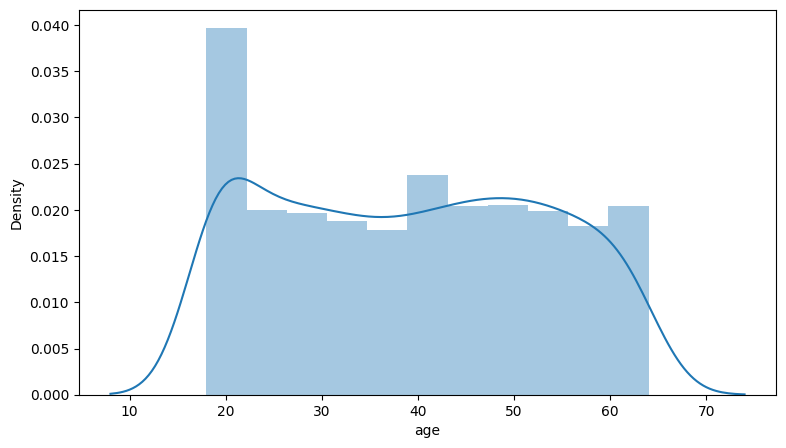

In [9]:
print(df.age.describe())

plt.figure(figsize = (9,5))
sns.distplot(df.age)
plt.show()

#### Age range is between 18 and 64 and the distribution of 'Age' column is almost symetric

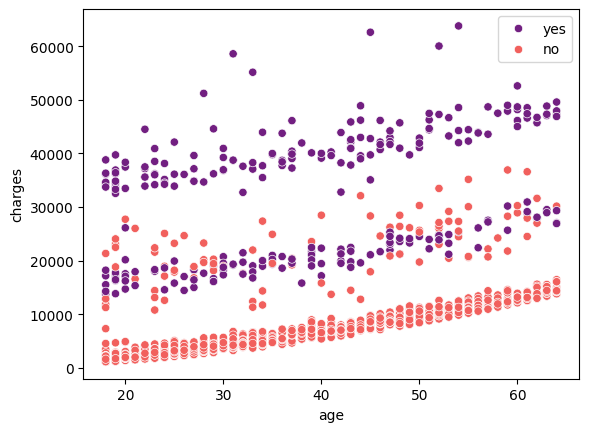

In [26]:
sns.scatterplot(x=df.age,y=df.charges,hue=df.smoker,palette='magma')
plt.legend(loc='upper right')
plt.show()

#### At the same age, smoking patients spend more on healthcare. But it seems like there are more non-smoking patients

### Sex Variable

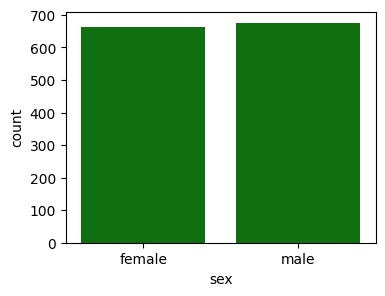

In [10]:
plt.figure(figsize=(4,3))
sns.countplot(df,x=df['sex'],color='g')
plt.show()

#### The distribution of  gender is almost balanced and this is a categorical variable , It would be better to apply encoding to avoid any error during model implementation

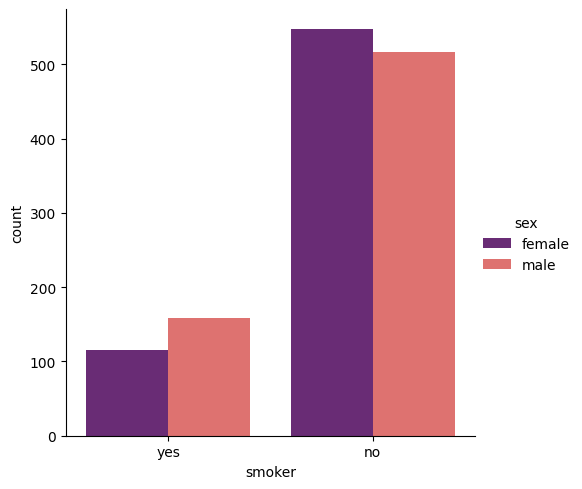

In [35]:
sns.catplot(data=df,x='smoker',hue ='sex', kind = 'count',palette='magma')
plt.show()

#### From the plot above , more men smoke than women .

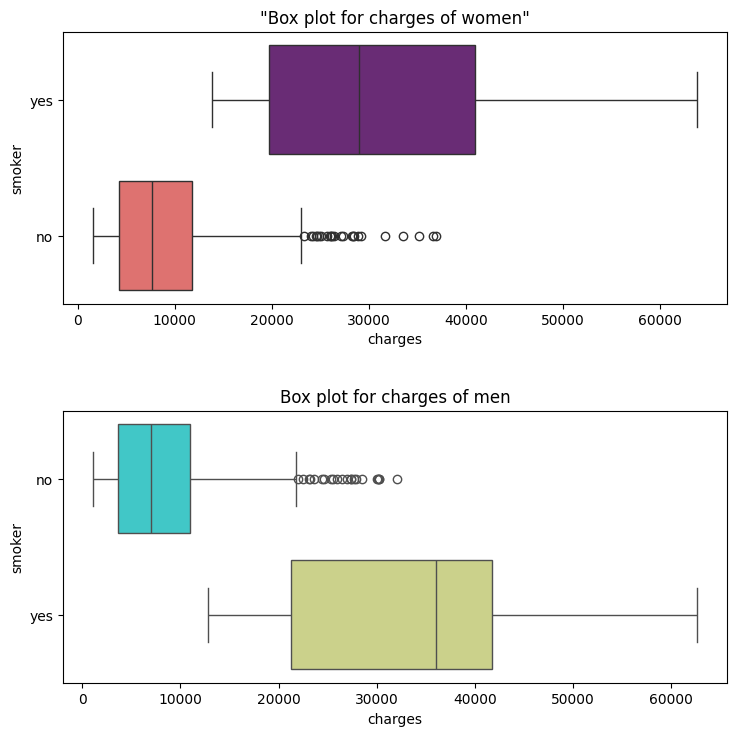

In [82]:
f= plt.figure(figsize=(8,8))

ax=f.add_subplot(211)
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 'female')], palette = 'magma')
ax.set_title('Box plot for charges of women')

ax=f.add_subplot(212)
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 'male')] , palette = 'rainbow')
ax.set_title('Box plot for charges of men')

plt.tight_layout(pad = 3)
plt.show()

 ### bmi Variable

count    1338.000000

mean       30.663397

std         6.098187

min        15.960000

25%        26.296250

50%        30.400000

75%        34.693750

max        53.130000

Name: bmi, dtype: float64


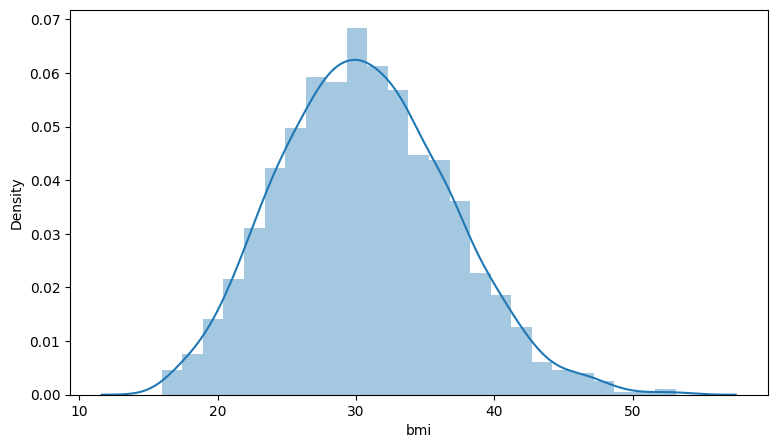

In [ ]:
print(df.bmi.describe())

plt.figure(figsize = (9,5))
sns.distplot(df.bmi)
plt.show()

#### the distribution of bmi column is almost symetric and he average bmi in patients is 30 , we will look at the distribution of costs in patients with BMI greater than 30 and less than 30.

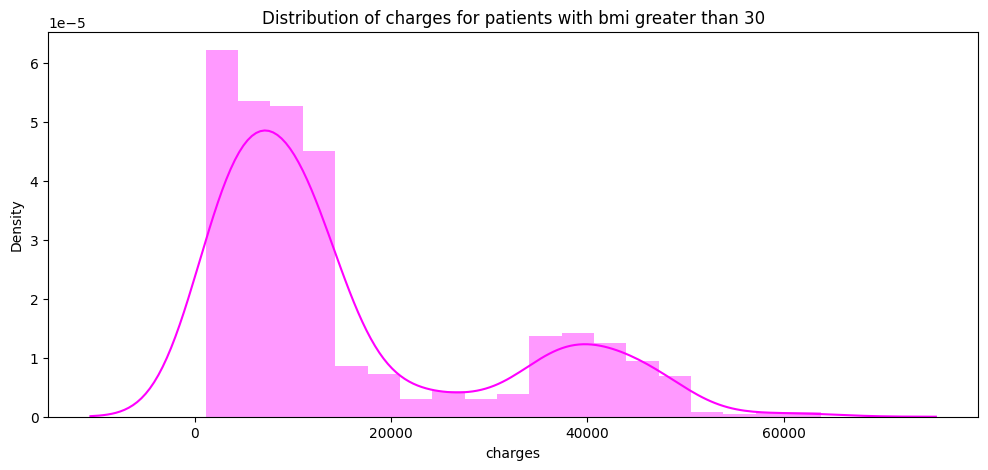

In [90]:
plt.figure(figsize=(12,5))
plt.title('Distribution of charges for patients with bmi greater than 30')
sns.distplot(df[(df.bmi >= 30)]['charges'], color = '#FF00FF')
plt.show()

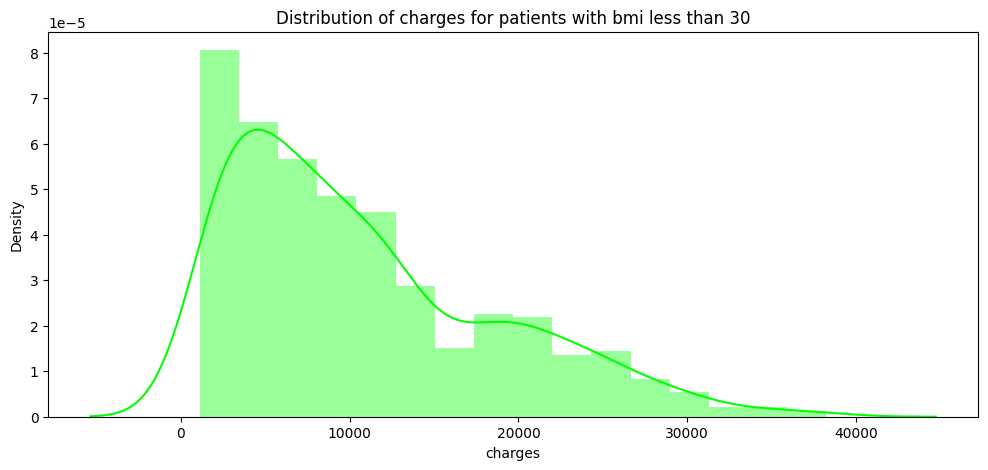

In [94]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with bmi less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = '#00ff00')

#### with comparison the last two plots , Patients with bmi above 30 spend more on treatment .

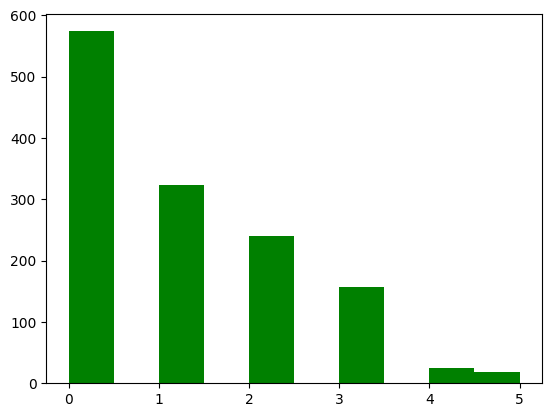

In [ ]:
plt.hist(df.children,color=['g'])
plt.show()

### Most patients  have no children

### outlier detection

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


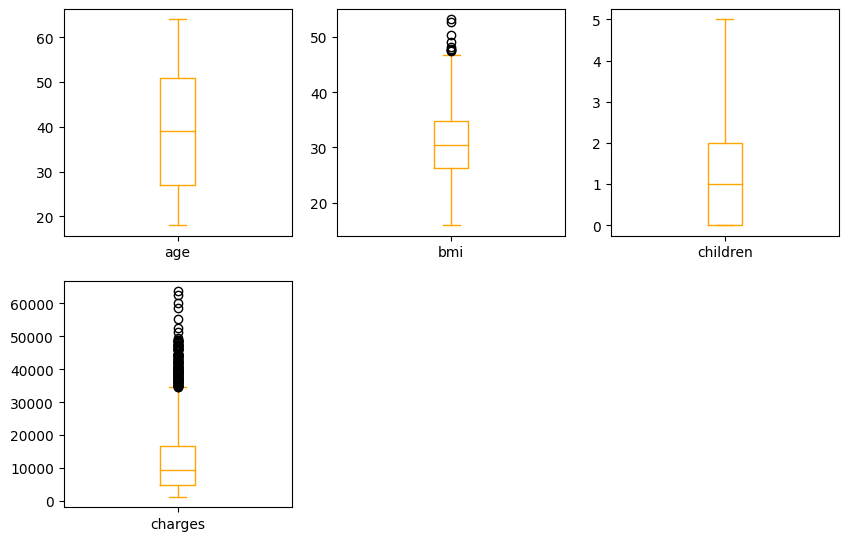

In [ ]:
df.plot(kind='box',figsize=(10,10),layout=(3,3),color='orange',subplots=True)
plt.show()

### check outlier for column bmi with shewhart

In [ ]:
df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [ ]:
# column bmi

print(f'mean+3*std is : {30.663397+3*6.098187}')
print(f'mean-3*std is : {30.663397-3*6.098187}')

mean+3*std is : 48.957958000000005

mean-3*std is : 12.368835999999998


In [ ]:
df.query('bmi>48.957958000000005')

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


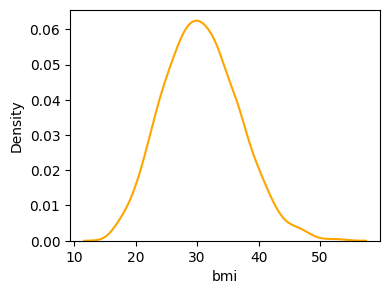

In [ ]:
plt.figure(figsize=(4,3))
sns.kdeplot(df.bmi,color='orange')
plt.show()

## 4. Data Set Preparation

### split data to x,y

In [ ]:
x = df.drop('charges',axis=1)
y = df['charges']

In [ ]:
print (f'the shape of x is : {x.shape}')
print (f'the shape of y is : {y.shape}')

the shape of x is : (1338, 6)

the shape of y is : (1338,)


### split data to train & test

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42,
                                                 shuffle=True)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1003, 6) (335, 6) (1003,) (335,)


In [ ]:
x_train_index = x_train.index
x_test_index = x_test.index
y_train_index = y_train.index
y_test_inex = y_test.index

In [ ]:
x_train

,age,sex,bmi,children,smoker,region
693,24,male,23.655,0,no,northwest
1297,28,female,26.510,2,no,southeast
634,51,male,39.700,1,no,southwest
1022,47,male,36.080,1,yes,southeast
178,46,female,28.900,2,no,southwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


### Scale the Target

In [ ]:
sc_t = StandardScaler()
y_train_sc = sc_t.fit_transform(np.array(y_train).reshape(-1,1))
y_test_sc = sc_t.transform(np.array(y_test).reshape(-1,1))

### scale and encode data with columntransformer

### determine categorical and numerical features

In [ ]:
cat_x = x.select_dtypes(include=['category','object']).columns
num_x = x.select_dtypes(include=['float','int']).columns

In [ ]:
cat_x

Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')
sc = StandardScaler()

In [ ]:
ct = ColumnTransformer(transformers=[('encoder',encoder,cat_x),('scaler',sc,num_x)],
                       remainder='passthrough',sparse_threshold=0)

## 5. Model

### Regression Function for Machine Learning Models

In [ ]:
def fitandeval (model , par , X_train=x_train , X_test=x_test , y_train=y_train_sc[:,-1] , y_test=y_test_sc[:,-1]):
  regressor= Pipeline(steps=[('columnstransformer', ct), ('model', model)])
  grid = GridSearchCV(regressor, par,error_score='raise')
  grid.fit(X_train , y_train)
  best_model=grid.best_estimator_
  y_pred_train=best_model.predict(X_train)

  y_pred=best_model.predict(X_test)
  print(f'best hyperparameters of {model} are {grid.best_params_}')
  ########################
  print()
  print()

  MSE_train=mean_squared_error(y_train ,best_model.predict(X_train))
  MAE_train= mean_absolute_error(y_train , best_model.predict(X_train))
  MSE=mean_squared_error(y_test , y_pred)
  MAE= mean_absolute_error(y_test , y_pred)
  r2_train=r2_score(y_train , best_model.predict(X_train))
  r2_test=r2_score(y_test , y_pred)
  corr_train=np.corrcoef(y_train , best_model.predict(X_train))
  corr_test=np.corrcoef(y_test , y_pred)


  print('MSE train =' ,MSE_train )
  print('MAE train =' ,MAE_train )
  print('R Score train =' , r2_train)
  print('correlation between y_pred and y_actual in train = ',corr_train[0, 1])
  print()
  print('MSE test =' ,MSE )
  print('MAE test =' ,MAE )
  print('R Score test=' , r2_test)
  print('correlation between y_pred and y_actual in test = ',corr_test[0, 1])
  print()

  sns.regplot(x=y_test,y=best_model.predict(X_test), color = 'g')
  plt.title('Actual vs Predicted (Test set)')
  plt.xlabel('Actual')
  plt.ylabel('Predict')
  plt.show()
  return MSE,MAE,r2_test , corr_test , best_model

### 1. linear regression

best hyperparameters of LinearRegression() are {}





MSE train = 0.25534162378945563

MAE train = 0.3477220924526531

R Score train = 0.7446583762105443

correlation between y_pred and y_actual in train =  0.8630331782198172



MSE test = 0.24278979642517298

MAE test = 0.35314457834119306

R Score test= 0.7665438325435165

correlation between y_pred and y_actual in test =  0.8760199656956438




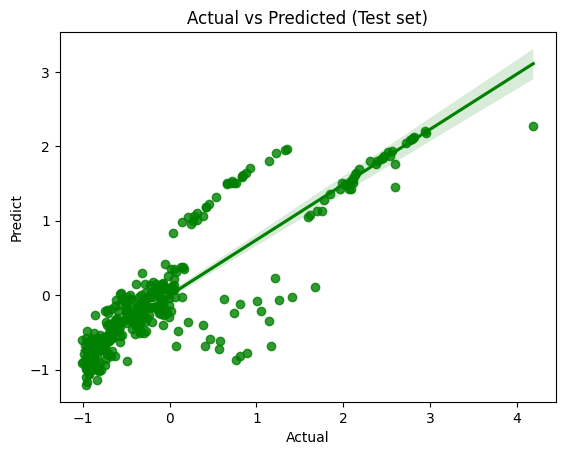

In [ ]:
param_lr = {}
MSE_LR , MAE_LR , R2_LR , Corr_LR  , best_LR=fitandeval(LinearRegression(),param_lr)

In [ ]:
best_LR

Pipeline(steps=[('columnstransformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['sex', 'smoker', 'region'], dtype='object')),
                                                 ('scaler', StandardScaler(),
                                                  Index(['age', 'bmi', 'children'], dtype='object'))])),
                ('model', LinearRegression())])

### SVR

best hyperparameters of SVR() are {'model__C': 1, 'model__degree': 3, 'model__gamma': 0.5, 'model__kernel': 'poly'}





MSE train = 0.1533737911624413

MAE train = 0.20349856879486572

R Score train = 0.8466262088375587

correlation between y_pred and y_actual in train =  0.9210243805301481



MSE test = 0.16167342309019458

MAE test = 0.20914793199325749

R Score test= 0.8445418288167648

correlation between y_pred and y_actual in test =  0.9200198246335314




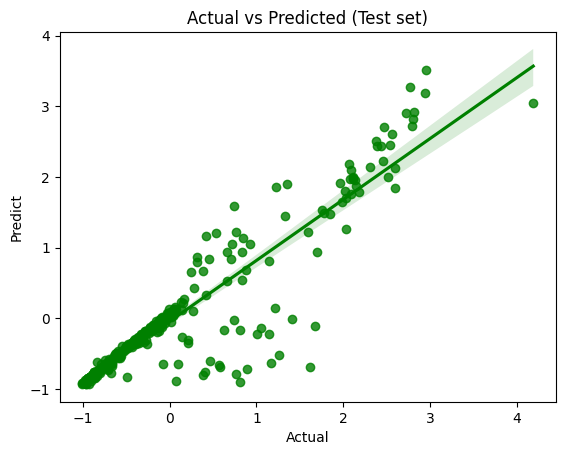

In [ ]:
param_svr = {'model__kernel':['poly'],
             'model__C':[0.7,0.9,1],
             'model__degree':[3],
             'model__gamma':[0.5,0.7,0.9]}
MSE_svr , MAE_svr , R2_svr , Corr_svr  , best_svr=fitandeval(SVR(),param_svr)

### KNN

best hyperparameters of KNeighborsRegressor() are {'model__n_neighbors': 5, 'model__p': 1, 'model__weights': 'distance'}





MSE train = 0.00125885777999024

MAE train = 0.0015843563377490506

R Score train = 0.9987411422200098

correlation between y_pred and y_actual in train =  0.999370372894859



MSE test = 0.2074676589334174

MAE test = 0.2708118042932199

R Score test= 0.8005080722546267

correlation between y_pred and y_actual in test =  0.8947802637478306




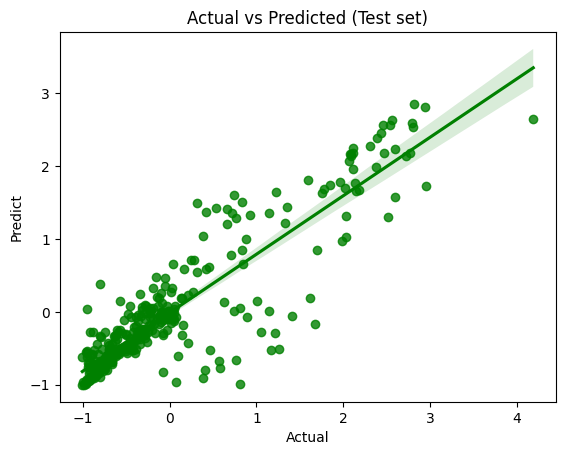

In [ ]:

param_knn = {'model__n_neighbors' : [3,5,9],
            'model__weights' : ['uniform', 'distance'],
            'model__p' : [1,2]}
MSE_knn , MAE_knn , R2_knn , Corr_knn  , best_knn=fitandeval(KNeighborsRegressor(),param_knn)

In [ ]:
best_knn

Pipeline(steps=[('columnstransformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['sex', 'smoker', 'region'], dtype='object')),
                                                 ('scaler', StandardScaler(),
                                                  Index(['age', 'bmi', 'children'], dtype='object'))])),
                ('model', KNeighborsRegressor(p=1, weights='distance'))])

### Decision Tree Regression

best hyperparameters of DecisionTreeRegressor(random_state=42) are {'model__max_depth': 5, 'model__min_samples_leaf': 20, 'model__min_samples_split': 3}





MSE train = 0.12575393460779677

MAE train = 0.20420527424169152

R Score train = 0.8742460653922033

correlation between y_pred and y_actual in train =  0.935011264847757



MSE test = 0.15672661714775651

MAE test = 0.2294780672990506

R Score test= 0.8492984634590631

correlation between y_pred and y_actual in test =  0.9230660257862607




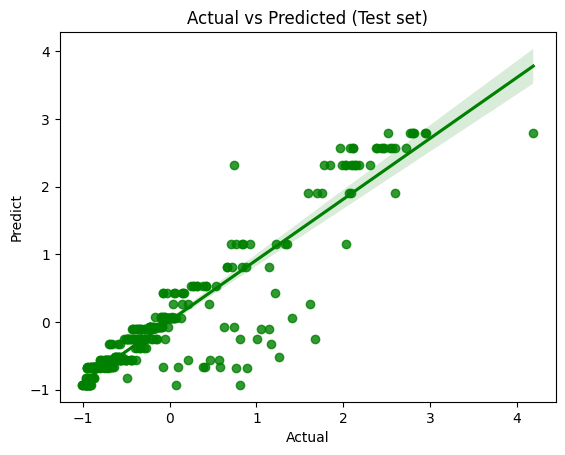

In [ ]:
parameters_DT ={
    'model__max_depth': [2, 3, 5, 10,15,17,20],
    'model__min_samples_leaf': [1,3,5, 10, 20, 50,],
    'model__min_samples_split' :[3,5,15]}


MSE_DT  , MAE_DT , R2_DT , Corr_DT , best_DT =fitandeval(DecisionTreeRegressor(random_state=42),parameters_DT)

In [ ]:
best_DT

Pipeline(steps=[('columnstransformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['sex', 'smoker', 'region'], dtype='object')),
                                                 ('scaler', StandardScaler(),
                                                  Index(['age', 'bmi', 'children'], dtype='object'))])),
                ('model',
                 DecisionTreeRegressor(max_depth=5, min_samples_leaf=20,
                                       min_samples_split=3, random_state=42))])

### Random Forest Reggrosser

best hyperparameters of RandomForestRegressor() are {'model__max_depth': 4, 'model__n_estimators': 10}





MSE train = 0.12445162394064165

MAE train = 0.19856685016142556

R Score train = 0.8755483760593583

correlation between y_pred and y_actual in train =  0.9357146515613567



MSE test = 0.14367779602158348

MAE test = 0.22079427357907347

R Score test= 0.8618456454856374

correlation between y_pred and y_actual in test =  0.9293380761057781




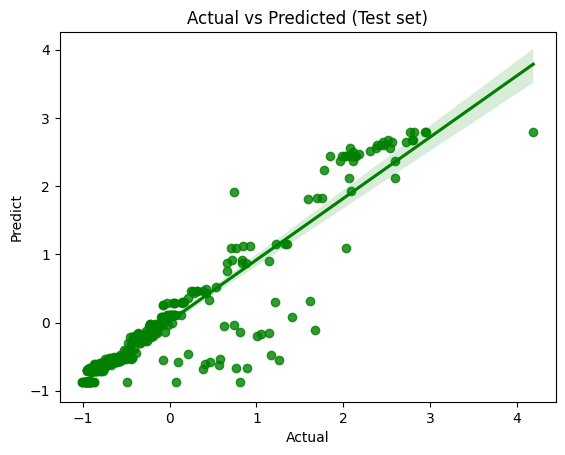

In [ ]:
parameters_RF = { 'model__n_estimators': [ 10,50,100],
    'model__max_depth' : [4,8,14],
              }

MSE_RF , MAE_RF , R2_RF , Corr_RF  , best_RF=fitandeval(RandomForestRegressor(),parameters_RF)

In [ ]:
best_RF

Pipeline(steps=[('columnstransformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['sex', 'smoker', 'region'], dtype='object')),
                                                 ('scaler', StandardScaler(),
                                                  Index(['age', 'bmi', 'children'], dtype='object'))])),
                ('model', RandomForestRegressor(max_depth=4, random_state=42))])

### Bagging Regressor

best hyperparameters of BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=20) are {'model__estimator__max_depth': 20, 'model__estimator__min_samples_leaf': 3, 'model__estimator__min_samples_split': 5, 'model__n_estimators': 100}





MSE train = 0.07231710676130454

MAE train = 0.14567559584467998

R Score train = 0.9276828932386955

correlation between y_pred and y_actual in train =  0.9634597902343705



MSE test = 0.1431704950698736

MAE test = 0.2062188799967737

R Score test= 0.8623334441397695

correlation between y_pred and y_actual in test =  0.9294781870467445




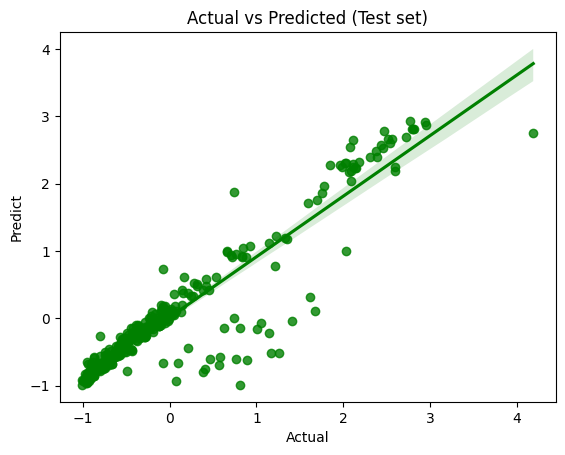

In [ ]:
base=DecisionTreeRegressor()
Bag=BaggingRegressor(estimator=base, n_estimators=20)
param_bag = {'model__n_estimators':[50,60,70,100],
            'model__estimator__max_depth':[10,15,20] ,
             'model__estimator__min_samples_split':[2,3,5],
             'model__estimator__min_samples_leaf':[1,2,3]}


MSE_Bag, MAE_Bag , R2_Bag , Corr_Bag , best_bag=fitandeval(Bag,param_bag )

### Boosting

### ADABOOST

best hyperparameters of AdaBoostRegressor(estimator=DecisionTreeRegressor(), n_estimators=20) are {'model__estimator__max_depth': 10, 'model__estimator__min_samples_leaf': 1, 'model__estimator__min_samples_split': 2, 'model__learning_rate': 0.8, 'model__n_estimators': 30}





MSE train = 0.005126053206397401

MAE train = 0.03261439318812018

R Score train = 0.9948739467936026

correlation between y_pred and y_actual in train =  0.9975398528328102



MSE test = 0.1542747489110132

MAE test = 0.1790727868122511

R Score test= 0.851656073910929

correlation between y_pred and y_actual in test =  0.9243735262622808




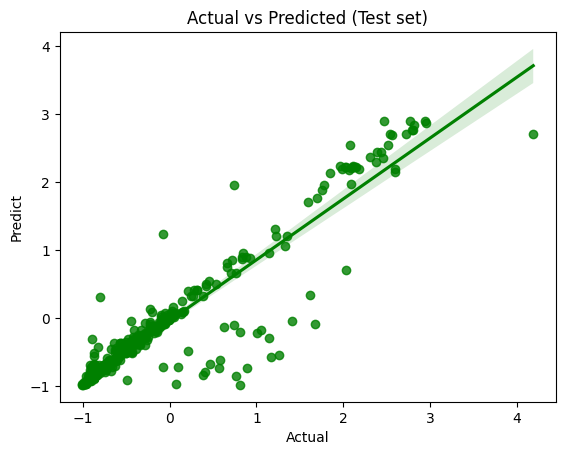

In [ ]:
DT_ada = DecisionTreeRegressor()

ada = AdaBoostRegressor(estimator=DT_ada,n_estimators=20)

param_ada = {'model__n_estimators':[20,30,50,60,70],
             'model__learning_rate':[0.6,0.8,0.9,1],
            'model__estimator__max_depth':[10,15,20] ,
             'model__estimator__min_samples_split':[2,3],
             'model__estimator__min_samples_leaf':[1,2]}

MSE_ada, MAE_ada , R2_ada , Corr_ada , best_ada=fitandeval(ada,param_ada )

In [ ]:
best_ada

Pipeline(steps=[('columnstransformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['sex', 'smoker', 'region'], dtype='object')),
                                                 ('scaler', StandardScaler(),
                                                  Index(['age', 'bmi', 'children'], dtype='object'))])),
                ('model',
                 AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=15,
                                                                   min_samples_split=3),
                                   learning_rate=1))])

### visualization the score of models

In [ ]:
dic={"MSE":[("{:.5f}".format(MSE_LR)),("{:.5f}".format(MSE_svr)),("{:.5f}".format(MSE_knn)), ("{:.5f}".format(MSE_DT)),
             ("{:.5f}".format(MSE_RF)),("{:.5f}".format(MSE_Bag)),("{:.5f}".format(MSE_ada)),
             ],

      "MAE":[("{:.5f}".format(MAE_LR)),("{:.5f}".format(MAE_svr)),("{:.5f}".format(MAE_knn)), ("{:.5f}".format(MAE_DT)),
             ("{:.5f}".format(MAE_RF)),("{:.5f}".format(MAE_Bag)),("{:.5f}".format(MAE_ada,)),
             ],

      "R2":[("{:.5f}".format(R2_LR)),("{:.5f}".format(R2_svr)),("{:.5f}".format(R2_knn)), ("{:.5f}".format(R2_DT)),
           ("{:.5f}".format(R2_RF)),("{:.5f}".format(R2_Bag)),("{:.5f}".format(R2_ada)),
             ],


      "Corr":[("{:.5f}".format(Corr_LR[0,1])),("{:.5f}".format(Corr_svr[0,1])),("{:.5f}".format(Corr_knn[0,1])), ("{:.5f}".format(Corr_DT[0,1])),
           ("{:.5f}".format(Corr_RF[0,1])),("{:.5f}".format(Corr_Bag[0,1])),("{:.5f}".format(Corr_ada[0,1])),
             ]}



main_data=pd.DataFrame.from_dict( dic , orient='index')
main_data.columns=['Linear regression','SVR','KNN','Decision Tree','RandomForest','Bagging','ADA Boost']
main_data = main_data.T
main_data

,MSE,MAE,R2,Corr
Linear regression,0.24279,0.35314,0.76654,0.87602
SVR,0.16167,0.20915,0.84454,0.92002
KNN,0.20747,0.27081,0.80051,0.89478
Decision Tree,0.15673,0.22948,0.84930,0.92307
RandomForest,0.14368,0.22079,0.86185,0.92934
Bagging,0.14317,0.20622,0.86233,0.92948
ADA Boost,0.15427,0.17907,0.85166,0.92437


In [ ]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>

Index: 7 entries, Linear regression to ADA Boost

Data columns (total 4 columns):

 #   Column  Non-Null Count  Dtype 

---  ------  --------------  ----- 

 0   MSE     7 non-null      object

 1   MAE     7 non-null      object

 2   R2      7 non-null      object

 3   Corr    7 non-null      object

dtypes: object(4)

memory usage: 280.0+ bytes


In [ ]:
for i in main_data.columns :
  main_data[i]=main_data[i].astype(float)

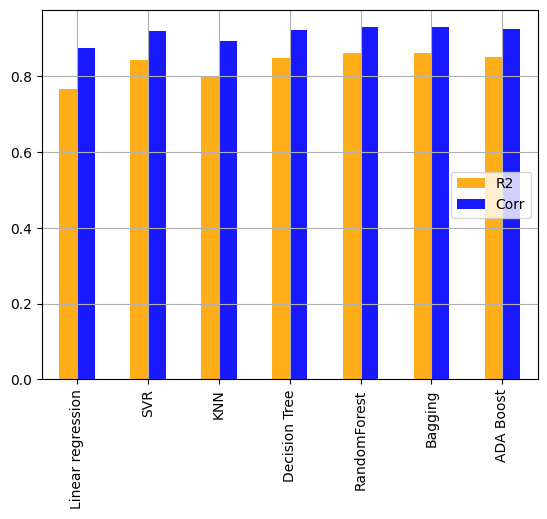

In [ ]:
ax=main_data.plot(kind='bar',y=['R2','Corr'],color=['orange','blue'],alpha=0.9)
plt.legend(loc='right')
plt.grid()
plt.show()


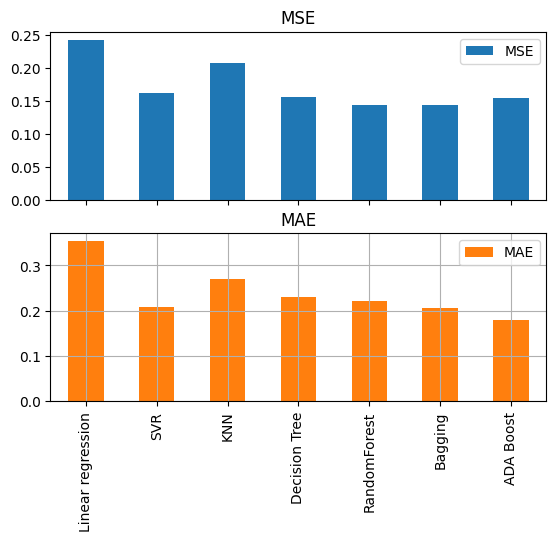

In [ ]:
ax=main_data.plot(kind='bar',y=['MSE','MAE'],subplots=True)
plt.legend(loc='upper right')
plt.grid()
plt.show()

### Regression Function for Voting and Stacking

In [ ]:
def fitandeval_VS (model , X_train=x_train , X_test=x_test , y_train=y_train_sc[:,-1] , y_test=y_test_sc[:,-1]):

  regressor=model

  regressor.fit(X_train , y_train)

  y_pred_train=regressor.predict(X_train)

  y_pred=regressor.predict(X_test)

  ########################
  print()
  print()

  MSE_train=mean_squared_error(y_train ,regressor.predict(X_train))
  MAE_train= mean_absolute_error(y_train , regressor.predict(X_train))
  MSE=mean_squared_error(y_test , y_pred)
  MAE= mean_absolute_error(y_test , y_pred)
  r2_train=r2_score(y_train , regressor.predict(X_train))
  r2_test=r2_score(y_test , y_pred)
  corr_train=np.corrcoef(y_train ,regressor.predict(X_train))
  corr_test=np.corrcoef(y_test , y_pred)


  print('MSE train =' ,MSE_train )
  print('MAE train =' ,MAE_train )
  print('R Score train =' , r2_train)
  print('correlation between y_pred and y_actual in train = ',corr_train[0, 1])
  print()
  print('MSE test =' ,MSE )
  print('MAE test =' ,MAE )
  print('R Score test=' , r2_test)
  print('correlation between y_pred and y_actual in test = ',corr_test[0, 1])
  print()

  sns.regplot(x=y_test, y=regressor.predict(X_test), color = 'g')
  plt.title('Actual vs Predicted (Test set)')
  plt.xlabel('Actual')
  plt.ylabel('Predict')
  plt.show()
  return MSE,MAE,r2_test , corr_test



### Voting

In [ ]:
estimators = [('knn',best_knn),
   ('DT',best_DT),
    ('rf',best_RF),
     ('bag',best_bag),
      ('ada',best_ada)]

vot=VotingRegressor(estimators=estimators)

In [ ]:
vot

VotingRegressor(estimators=[('knn',
                             Pipeline(steps=[('columnstransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                sparse_threshold=0,
                                                                transformers=[('encoder',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               Index(['sex', 'smoker', 'region'], dtype='object')),
                                                                              ('scaler',
                                                                               StandardScaler(),
                                                                               Index(['age', 'bmi', 'children'], dtype='object'))])),
                                             ('model',
                                              KNeighborsRegres...
                                              ColumnTransformer(remainder='passthrough',
                                                                sparse_threshold=0,
                                                                transformers=[('encoder',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               Index(['sex', 'smoker', 'region'], dtype='object')),
                                                                              ('scaler',
                                                                               StandardScaler(),
                                                                               Index(['age', 'bmi', 'children'], dtype='object'))])),
                                             ('model',
                                              AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=10),
                                                                learning_rate=0.8,
                                                                n_estimators=30))]))])





MSE train = 0.038977736556045466

MAE train = 0.11316362260462352

R Score train = 0.9610222634439546

correlation between y_pred and y_actual in train =  0.9809368845846754



MSE test = 0.14554981715188295

MAE test = 0.2053903101597234

R Score test= 0.8600455909326366

correlation between y_pred and y_actual in test =  0.927723175762568




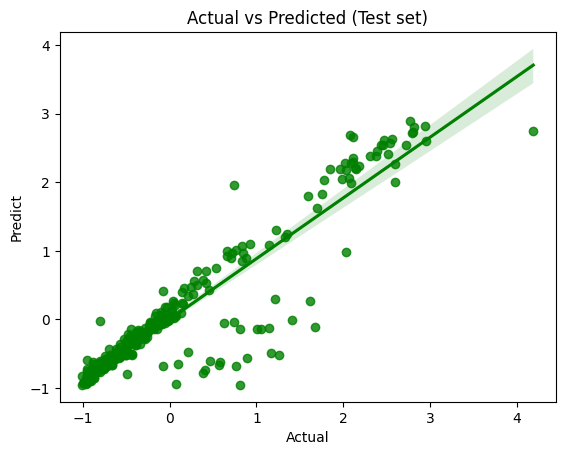

In [ ]:
MSE_VOT, MAE_VOT, R2_VOT , Corr_VOT = fitandeval_VS(vot)

### stacking

In [ ]:
level_0 = [('knn',best_knn),
   ('DT',best_DT),
    ('rf',best_RF),
     ('bag',best_bag),
      ('ada',best_ada)]
level_1 = LinearRegression()
st = StackingRegressor(estimators=level_0,final_estimator=level_1)
st

StackingRegressor(estimators=[('knn',
                               Pipeline(steps=[('columnstransformer',
                                                ColumnTransformer(remainder='passthrough',
                                                                  sparse_threshold=0,
                                                                  transformers=[('encoder',
                                                                                 OneHotEncoder(handle_unknown='ignore'),
                                                                                 Index(['sex', 'smoker', 'region'], dtype='object')),
                                                                                ('scaler',
                                                                                 StandardScaler(),
                                                                                 Index(['age', 'bmi', 'children'], dtype='object'))])),
                                               ('model',
                                                KNeighborsRegr...
                                                                  sparse_threshold=0,
                                                                  transformers=[('encoder',
                                                                                 OneHotEncoder(handle_unknown='ignore'),
                                                                                 Index(['sex', 'smoker', 'region'], dtype='object')),
                                                                                ('scaler',
                                                                                 StandardScaler(),
                                                                                 Index(['age', 'bmi', 'children'], dtype='object'))])),
                                               ('model',
                                                AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=10),
                                                                  learning_rate=0.8,
                                                                  n_estimators=30))]))],
                  final_estimator=LinearRegression())





MSE train = 0.08828021042425756

MAE train = 0.16761986892824077

R Score train = 0.9117197895757424

correlation between y_pred and y_actual in train =  0.954905460917265



MSE test = 0.14486419314584376

MAE test = 0.21902133783984606

R Score test= 0.8607048573232463

correlation between y_pred and y_actual in test =  0.9286671914826834




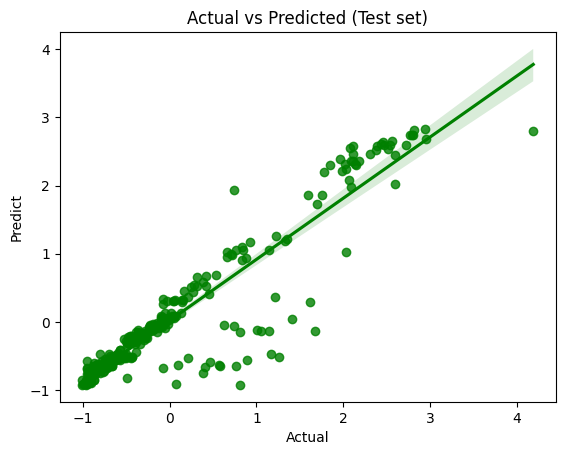

In [ ]:
MSE_ST, MAE_ST, R2_ST , Corr_ST = fitandeval_VS(st)

## 6. Compare the result of Model

In [ ]:
dic1={"MSE":[("{:.5f}".format(MSE_LR)),("{:.5f}".format(MSE_svr)),("{:.5f}".format(MSE_knn)), ("{:.5f}".format(MSE_DT)),
             ("{:.5f}".format(MSE_RF)),("{:.5f}".format(MSE_Bag)),("{:.5f}".format(MSE_ada)),
             ("{:.5f}".format(MSE_VOT)),("{:.5f}".format(MSE_ST,))],

      "MAE":[("{:.5f}".format(MAE_LR)),("{:.5f}".format(MAE_svr)),("{:.5f}".format(MAE_knn)), ("{:.5f}".format(MAE_DT)),
             ("{:.5f}".format(MAE_RF)),("{:.5f}".format(MAE_Bag)),("{:.5f}".format(MAE_ada,)),
             ("{:.5f}".format(MAE_VOT)),("{:.5f}".format(MAE_ST,))],

      "R2":[("{:.5f}".format(R2_LR)),("{:.5f}".format(R2_svr)),("{:.5f}".format(R2_knn)), ("{:.5f}".format(R2_DT)),
           ("{:.5f}".format(R2_RF)),("{:.5f}".format(R2_Bag)),("{:.5f}".format(R2_ada)),
             ("{:.5f}".format(R2_VOT)),("{:.5f}".format(R2_ST))],


      "Corr":[("{:.5f}".format(Corr_LR[0,1])),("{:.5f}".format(Corr_svr[0,1])),("{:.5f}".format(Corr_knn[0,1])), ("{:.5f}".format(Corr_DT[0,1])),
           ("{:.5f}".format(Corr_RF[0,1])),("{:.5f}".format(Corr_Bag[0,1])),("{:.5f}".format(Corr_ada[0,1])),
             ("{:.5f}".format(Corr_VOT[0,1])),("{:.5f}".format(Corr_ST[0,1],))]}



main_data1=pd.DataFrame.from_dict( dic1 , orient='index')
main_data1.columns=['Linear regression','SVR','KNN','Decision Tree','RandomForest','Bagging','ADA Boost',
                    'Voting','Stacking ']
main_data1 = main_data1.T
main_data1

,MSE,MAE,R2,Corr
Linear regression,0.24279,0.35314,0.76654,0.87602
SVR,0.16167,0.20915,0.84454,0.92002
KNN,0.20747,0.27081,0.80051,0.89478
Decision Tree,0.15673,0.22948,0.84930,0.92307
RandomForest,0.14368,0.22079,0.86185,0.92934
Bagging,0.14317,0.20622,0.86233,0.92948
ADA Boost,0.15427,0.17907,0.85166,0.92437
Voting,0.14555,0.20539,0.86005,0.92772
Stacking,0.14486,0.21902,0.86070,0.92867


### visualization the result

In [ ]:
for i in main_data1.columns :
  main_data1[i]=main_data1[i].astype(float)

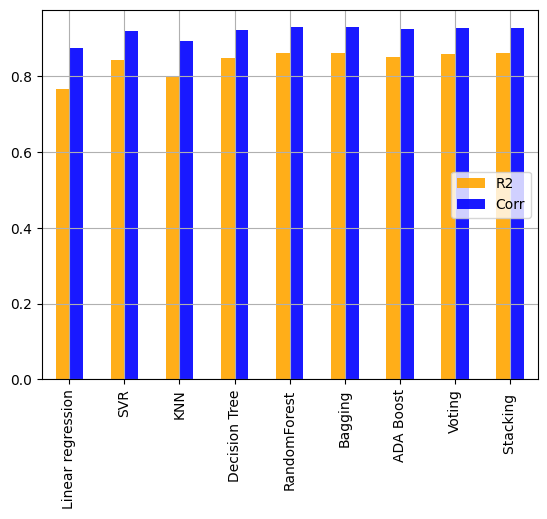

In [ ]:
ax=main_data1.plot(kind='bar',y=['R2','Corr'],color=['orange','blue'],alpha=0.9)
plt.legend(loc='right')
plt.grid()
plt.show()

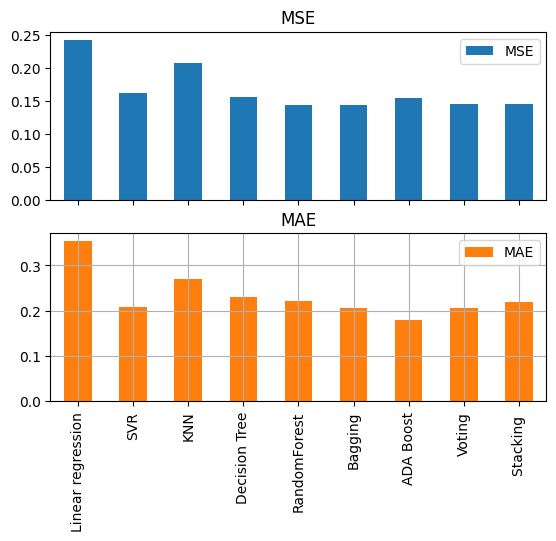

In [ ]:
ax=main_data1.plot(kind='bar',y=['MSE','MAE'],subplots=True)
plt.legend(loc='upper right')
plt.grid()
plt.show()

#### Stacking (with hyperparameter tuning) have a good scores.